In [3]:
import pandas as pd
df=pd.read_csv("/Users/affanqureshi/Desktop/affan/Amazon Delivery Time Prediction/amazon_delivery.csv")

### Looking the dataset

In [4]:
df.head()


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Standerdizing the columns by converting them into lower case

In [5]:
df.columns=df.columns.str.strip().str.lower()

In [6]:
df['traffic']=df['traffic'].str.strip()
df['weather']=df['weather'].str.strip()
df['vehicle']=df['vehicle'].str.strip()
df['area']=df['area'].str.strip()
df['category']=df['category'].str.strip()

In [7]:
df['weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

### checking no. of rows and columns

In [8]:
df.shape

(43739, 16)

### Taking a look at dtypes of each column

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         43739 non-null  object 
 1   agent_age        43739 non-null  int64  
 2   agent_rating     43685 non-null  float64
 3   store_latitude   43739 non-null  float64
 4   store_longitude  43739 non-null  float64
 5   drop_latitude    43739 non-null  float64
 6   drop_longitude   43739 non-null  float64
 7   order_date       43739 non-null  object 
 8   order_time       43739 non-null  object 
 9   pickup_time      43739 non-null  object 
 10  weather          43648 non-null  object 
 11  traffic          43739 non-null  object 
 12  vehicle          43739 non-null  object 
 13  area             43739 non-null  object 
 14  delivery_time    43739 non-null  int64  
 15  category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


### Identifying and handelling missing values

In [10]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary)

weather            91
agent_rating       54
order_id            0
agent_age           0
store_latitude      0
store_longitude     0
drop_latitude       0
drop_longitude      0
order_date          0
order_time          0
pickup_time         0
traffic             0
vehicle             0
area                0
delivery_time       0
category            0
dtype: int64


In [11]:
df["agent_rating"]=df['agent_rating'].fillna(df["agent_rating"].median())

In [12]:
df=df.dropna(subset="weather")

In [13]:
# Missing values summary
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary)



order_id           0
agent_age          0
agent_rating       0
store_latitude     0
store_longitude    0
drop_latitude      0
drop_longitude     0
order_date         0
order_time         0
pickup_time        0
weather            0
traffic            0
vehicle            0
area               0
delivery_time      0
category           0
dtype: int64


In [14]:
df.shape

(43648, 16)

### converting dates related columns into date_time dtype

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'])
df['pickup_time'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['pickup_time'])


In [16]:
df.head()

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43648 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         43648 non-null  object        
 1   agent_age        43648 non-null  int64         
 2   agent_rating     43648 non-null  float64       
 3   store_latitude   43648 non-null  float64       
 4   store_longitude  43648 non-null  float64       
 5   drop_latitude    43648 non-null  float64       
 6   drop_longitude   43648 non-null  float64       
 7   order_date       43648 non-null  datetime64[ns]
 8   order_time       43648 non-null  datetime64[ns]
 9   pickup_time      43648 non-null  datetime64[ns]
 10  weather          43648 non-null  object        
 11  traffic          43648 non-null  object        
 12  vehicle          43648 non-null  object        
 13  area             43648 non-null  object        
 14  delivery_time    43648 non-null  int64     

### Analyzing categorical columns

In [18]:
categorical_cols = ['weather', 'traffic', 'vehicle', 'area', 'category']
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    print(df[col].value_counts(normalize=False))



weather unique values: 6
weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

traffic unique values: 4
traffic
Low       14999
Jam       13725
Medium    10628
High       4296
Name: count, dtype: int64

vehicle unique values: 3
vehicle
motorcycle    25519
scooter       14607
van            3522
Name: count, dtype: int64

area unique values: 4
area
Metropolitian    32634
Urban             9726
Other             1136
Semi-Urban         152
Name: count, dtype: int64

category unique values: 16
category
Electronics     2843
Books           2817
Jewelry         2796
Toys            2773
Snacks          2767
Skincare        2766
Outdoors        2741
Apparel         2722
Sports          2711
Grocery         2688
Pet Supplies    2684
Home            2680
Cosmetics       2670
Kitchen         2667
Clothing        2662
Shoes           2661
Name: count, dtype: int64


### creating a new col named prep time (it is the difference in time between order_time and pickup_time)

In [19]:
# Ensure order_date is already datetime (if not, convert once)
from datetime import timedelta

df['order_date'] = pd.to_datetime(df['order_date'])


In [20]:

df.loc[df['pickup_time'] < df['order_time'], 'pickup_time'] += timedelta(days=1)



In [21]:
df['prep_time'] = (df['pickup_time'] - df['order_time']).dt.total_seconds() / 60


In [22]:
df.head()

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,15.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,5.0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,15.0
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,10.0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,15.0


In [23]:
# Quick check
print(df[['order_time', 'pickup_time', 'prep_time']].head())


           order_time         pickup_time  prep_time
0 2022-03-19 11:30:00 2022-03-19 11:45:00       15.0
1 2022-03-25 19:45:00 2022-03-25 19:50:00        5.0
2 2022-03-19 08:30:00 2022-03-19 08:45:00       15.0
3 2022-04-05 18:00:00 2022-04-05 18:10:00       10.0
4 2022-03-26 13:30:00 2022-03-26 13:45:00       15.0


In [24]:
df[df["prep_time"]<0]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time


### creating a column to calculate the distance between store and drop locstion

In [25]:
import numpy as np

# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    # Convert degrees → radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Deltas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to dataset
df['delivery_distance_km'] = haversine(
    df['store_latitude'], df['store_longitude'],
    df['drop_latitude'], df['drop_longitude']
)
df['delivery_distance_km']=df['delivery_distance_km'].round(2)

# Quick check
print(df[['store_latitude','store_longitude','drop_latitude','drop_longitude','delivery_distance_km']].head())


   store_latitude  store_longitude  drop_latitude  drop_longitude  \
0       22.745049        75.892471      22.765049       75.912471   
1       12.913041        77.683237      13.043041       77.813237   
2       12.914264        77.678400      12.924264       77.688400   
3       11.003669        76.976494      11.053669       77.026494   
4       12.972793        80.249982      13.012793       80.289982   

   delivery_distance_km  
0                  3.03  
1                 20.18  
2                  1.55  
3                  7.79  
4                  6.21  


this code is to check whether our haversine funtion is accurate or not

In [26]:
print(haversine(0.0, 0.0, 0.11, 0.11))


17.29786575291325


In [27]:
from geopy.distance import geodesic

point1 = (48.8584, 2.2945)
point2 = (48.8606, 2.3376)

print("Haversine:", haversine(*point1, *point2))
print("Geopy:", geodesic(point1, point2).km)


ModuleNotFoundError: No module named 'geopy'

In [28]:
max_distance = df['delivery_distance_km'].max()
max_distance

np.float64(6884.73)

In [29]:
max_distance = df['delivery_distance_km'].max()
row_with_max_distance = df[df['delivery_distance_km'] == max_distance]
print(row_with_max_distance)


           order_id  agent_age  agent_rating  store_latitude  store_longitude  \
3902  mtjl328422300         36           5.0      -30.902872        75.826808   

      drop_latitude  drop_longitude order_date          order_time  \
3902      31.012872       75.936808 2022-02-12 2022-02-12 18:10:00   

             pickup_time weather traffic     vehicle           area  \
3902 2022-02-12 18:20:00   Windy  Medium  motorcycle  Metropolitian   

      delivery_time category  prep_time  delivery_distance_km  
3902            125  Apparel       10.0               6884.73  


In [30]:
df[df["store_latitude"]<0]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km
90,hnme204254454,34,4.7,-27.163303,78.057044,27.233303,78.127044,2022-02-16,2022-02-16 23:00:00,2022-02-16 23:05:00,Sandstorms,Low,scooter,Metropolitian,75,Clothing,5.0,6048.63
275,mctx146223837,32,4.7,-27.165108,78.015053,27.225108,78.075053,2022-02-13,2022-02-13 20:55:00,2022-02-13 21:10:00,Sandstorms,Jam,scooter,Metropolitian,155,Clothing,15.0,6047.92
1045,jxrf169692899,20,4.7,-15.546594,73.760431,15.606594,73.820431,2022-02-13,2022-02-13 20:00:00,2022-02-13 20:10:00,Cloudy,Jam,motorcycle,Metropolitian,145,Toys,10.0,3464.08
1705,csyn869746139,39,4.5,-23.230791,77.437020,23.250791,77.457020,2022-02-13,2022-02-13 09:15:00,2022-02-13 09:20:00,Cloudy,Low,motorcycle,Metropolitian,145,Books,5.0,5168.52
1893,bocx711605816,25,4.0,-22.539129,88.365507,22.549129,88.375507,2022-02-15,2022-02-15 09:25:00,2022-02-15 09:30:00,Sandstorms,Low,motorcycle,Metropolitian,95,Toys,5.0,5013.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42071,lzux792298119,32,4.6,-15.498603,73.826911,15.568603,73.896911,2022-02-18,2022-02-18 23:10:00,2022-02-18 23:15:00,Sandstorms,Low,motorcycle,Metropolitian,120,Toys,5.0,3454.52
42252,lpkh473392828,22,5.0,-15.157944,73.950889,15.217944,74.010889,2022-02-17,2022-02-17 18:50:00,2022-02-17 18:55:00,Sandstorms,Medium,scooter,Metropolitian,135,Sports,5.0,3377.65
42824,nnam562968751,23,4.8,-9.982834,76.283268,10.072834,76.373268,2022-02-14,2022-02-14 19:20:00,2022-02-14 19:35:00,Sunny,Jam,motorcycle,Metropolitian,105,Sports,15.0,2230.11
43105,pvcj122440792,30,4.9,-19.874733,75.353942,19.904733,75.383942,2022-02-15,2022-02-15 22:20:00,2022-02-15 22:35:00,Fog,Low,motorcycle,Metropolitian,75,Pet Supplies,15.0,4423.28


In [31]:
# Example: India coordinate ranges (adjust if needed)
lat_min, lat_max = -1, 37
lon_min, lon_max = 68, 97

bad_coords = df[
    (df['store_latitude'] < lat_min) | (df['store_latitude'] > lat_max) |
    (df['store_longitude'] < lon_min) | (df['store_longitude'] > lon_max)
]

# Show the bad rows
from IPython.display import display
display(bad_coords)

# Count how many rows are invalid
print("Number of invalid coordinates:", bad_coords.shape[0])


,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km
33,zotl583816092,32,3.5,0.0,0.0,0.11,0.11,2022-03-08,2022-03-08 21:35:00,2022-03-08 21:45:00,Stormy,Jam,scooter,Urban,35,Grocery,10.0,17.30
51,dcdm719150402,25,5.0,0.0,0.0,0.03,0.03,2022-02-13,2022-02-13 22:10:00,2022-02-13 22:25:00,Cloudy,Low,motorcycle,Metropolitian,75,Home,15.0,4.72
56,bbow373480117,39,4.2,0.0,0.0,0.08,0.08,2022-03-02,2022-03-02 20:35:00,2022-03-02 20:50:00,Fog,Jam,scooter,Semi-Urban,245,Apparel,15.0,12.58
58,etss702593505,36,4.7,0.0,0.0,0.06,0.06,2022-03-13,2022-03-13 20:15:00,2022-03-13 20:20:00,Cloudy,Jam,motorcycle,Metropolitian,150,Sports,5.0,9.44
66,emlt327861941,23,4.8,0.0,0.0,0.02,0.02,2022-03-07,2022-03-07 10:40:00,2022-03-07 10:50:00,Stormy,Low,scooter,Metropolitian,15,Grocery,10.0,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43715,lzan335958845,26,4.9,0.0,0.0,0.07,0.07,2022-03-10,2022-03-10 19:35:00,2022-03-10 19:45:00,Fog,Jam,scooter,Metropolitian,32,Grocery,10.0,11.01
43722,gbvc892665917,34,4.2,0.0,0.0,0.13,0.13,2022-04-04,2022-04-04 17:25:00,2022-04-04 17:30:00,Stormy,Medium,motorcycle,Urban,240,Clothing,5.0,20.44
43723,xczj095858269,25,4.7,0.0,0.0,0.09,0.09,2022-03-29,2022-03-29 22:10:00,2022-03-29 22:15:00,Cloudy,Low,motorcycle,Metropolitian,105,Shoes,5.0,14.15
43725,wjsq095299773,32,4.6,0.0,0.0,0.05,0.05,2022-02-15,2022-02-15 18:10:00,2022-02-15 18:20:00,Stormy,Medium,scooter,Metropolitian,135,Skincare,10.0,7.86


Number of invalid coordinates: 3651


In [32]:
import numpy as np

# Define IQR bounds for delivery_distance_km
Q1 = df['delivery_distance_km'].quantile(0.25)
Q3 = df['delivery_distance_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract outliers
distance_outliers = df[(df['delivery_distance_km'] < lower_bound) | (df['delivery_distance_km'] > upper_bound)]

print("Number of delivery distance outliers:", len(distance_outliers))
print("Lower Bound:", round(lower_bound,2), "Upper Bound:", round(upper_bound,2))
print(distance_outliers[['store_latitude','store_longitude','drop_latitude','drop_longitude','delivery_distance_km']].head())

Number of delivery distance outliers: 156
Lower Bound: -8.87 Upper Bound: 27.21
      store_latitude  store_longitude  drop_latitude  drop_longitude  \
90        -27.163303        78.057044      27.233303       78.127044   
275       -27.165108        78.015053      27.225108       78.075053   
1045      -15.546594        73.760431      15.606594       73.820431   
1705      -23.230791        77.437020      23.250791       77.457020   
1893      -22.539129        88.365507      22.549129       88.375507   

      delivery_distance_km  
90                 6048.63  
275                6047.92  
1045               3464.08  
1705               5168.52  
1893               5013.59  


In [33]:
df = df.drop(bad_coords.index)


In [34]:
df.loc[df['store_latitude'] < 0, 'store_latitude'] = df['store_latitude'].abs()


In [35]:
df.shape

(39997, 18)

In [36]:
df[df["store_latitude"]<0]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km


In [37]:

# Apply to dataset
df['delivery_distance_km'] = haversine(
    df['store_latitude'], df['store_longitude'],
    df['drop_latitude'], df['drop_longitude']
)
df['delivery_distance_km']=df['delivery_distance_km'].round(2)

# Quick check
print(df[['store_latitude','store_longitude','drop_latitude','drop_longitude','delivery_distance_km']].head())

   store_latitude  store_longitude  drop_latitude  drop_longitude  \
0       22.745049        75.892471      22.765049       75.912471   
1       12.913041        77.683237      13.043041       77.813237   
2       12.914264        77.678400      12.924264       77.688400   
3       11.003669        76.976494      11.053669       77.026494   
4       12.972793        80.249982      13.012793       80.289982   

   delivery_distance_km  
0                  3.03  
1                 20.18  
2                  1.55  
3                  7.79  
4                  6.21  


In [38]:
max_distance = df['delivery_distance_km'].max()
row_with_max_distance = df[df['delivery_distance_km'] == max_distance].head()
print(row_with_max_distance)


           order_id  agent_age  agent_rating  store_latitude  store_longitude  \
874   ojkf639678702         22           4.7       25.443994        81.860187   
2574  voub093574853         36           5.0       25.451517        81.832616   
3318  fguk113789004         23           4.8       25.459775        81.834841   
3829  uolz070574836         20           3.1       25.454648        81.834502   
4150  rmdo829051773         35           4.2       25.451646        81.832796   

      drop_latitude  drop_longitude order_date          order_time  \
874       25.583994       82.000187 2022-02-16 2022-02-16 22:55:00   
2574      25.591517       81.972616 2022-02-16 2022-02-16 18:40:00   
3318      25.599775       81.974841 2022-02-18 2022-02-18 18:20:00   
3829      25.594648       81.974502 2022-02-14 2022-02-14 23:10:00   
4150      25.591646       81.972796 2022-02-12 2022-02-12 22:00:00   

             pickup_time     weather traffic     vehicle           area  \
874  2022-02-16 2

In [39]:
df.shape

(39997, 18)

In [40]:
import numpy as np

# Define IQR bounds for delivery_distance_km
Q1 = df['delivery_distance_km'].quantile(0.25)
Q3 = df['delivery_distance_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract outliers
distance_outliers = df[(df['delivery_distance_km'] < lower_bound) | (df['delivery_distance_km'] > upper_bound)]

print("Number of delivery distance outliers:", len(distance_outliers))
print("Lower Bound:", round(lower_bound,2), "Upper Bound:", round(upper_bound,2))
print(distance_outliers[['store_latitude','store_longitude','drop_latitude','drop_longitude','delivery_distance_km']].head())


Number of delivery distance outliers: 0
Lower Bound: -8.8 Upper Bound: 27.08
Empty DataFrame
Columns: [store_latitude, store_longitude, drop_latitude, drop_longitude, delivery_distance_km]
Index: []


In [41]:
df[df["delivery_distance_km"]>20]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,5.0,20.18
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,2022-03-14 17:25:00,2022-03-14 17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks,5.0,20.21
22,rkzt648036688,33,4.3,12.986047,80.218114,13.116047,80.348114,2022-03-27,2022-03-27 19:30:00,2022-03-27 19:45:00,Windy,Jam,scooter,Metropolitian,195,Snacks,15.0,20.18
105,ixfk439251990,21,4.3,12.284747,76.625861,12.414747,76.755861,2022-03-23,2022-03-23 20:10:00,2022-03-23 20:20:00,Fog,Jam,scooter,Metropolitian,210,Books,10.0,20.21
107,drir663128253,32,4.2,11.000762,76.981876,11.130762,77.111876,2022-03-08,2022-03-08 20:35:00,2022-03-08 20:45:00,Cloudy,Jam,motorcycle,Metropolitian,190,Skincare,10.0,20.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43598,sjbi068062670,35,4.2,12.316967,76.603067,12.446967,76.733067,2022-03-10,2022-03-10 20:15:00,2022-03-10 20:20:00,Windy,Jam,scooter,Metropolitian,210,Shoes,5.0,20.21
43618,ctze619942656,24,4.8,15.544419,73.755736,15.674419,73.885736,2022-02-18,2022-02-18 23:00:00,2022-02-18 23:10:00,Stormy,Low,scooter,Urban,17,Grocery,10.0,20.07
43629,refv611882469,28,4.7,9.982834,76.283268,10.112834,76.413268,2022-02-18,2022-02-18 19:50:00,2022-02-18 20:05:00,Sunny,Jam,motorcycle,Metropolitian,115,Clothing,15.0,20.29
43663,zjzf371120807,33,4.9,30.335259,78.053162,30.475259,78.193162,2022-02-16,2022-02-16 18:10:00,2022-02-16 18:20:00,Fog,Medium,van,Urban,205,Cosmetics,10.0,20.56


### Checking delivery time outlier

In [42]:
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers_iqr = df[(df['delivery_time'] < lower_bound) | (df['delivery_time'] > upper_bound)]

print("Number of outliers (IQR):", len(outliers_iqr))
print("Lower Bound:", round(lower_bound,2), "Upper Bound:", round(upper_bound,2))


Number of outliers (IQR): 74
Lower Bound: -15.0 Upper Bound: 265.0


In [43]:
import numpy as np

mean = df['delivery_time'].mean()
std = df['delivery_time'].std()

z_scores = (df['delivery_time'] - mean) / std

outliers_z = df[np.abs(z_scores) > 3]  # 3 std devs away
print("Number of outliers (Z-score):", len(outliers_z))


Number of outliers (Z-score): 0


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['delivery_time'])
plt.title("Delivery Time Outliers")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [45]:
df.to_csv("cleaned_delivery.csv")

### Data Visualization

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'matplotlib'

In [47]:
plt.bar(df["delivery_time"],df["category"])
plt.xlabel("Delivery Time")
plt.ylabel("Category")
plt.title("Delivery Time by Category")
plt.show()

NameError: name 'plt' is not defined

<Axes: xlabel='delivery_time', ylabel='Count'>

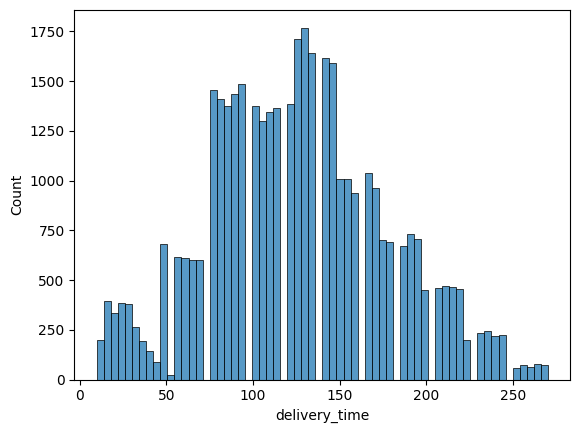

In [ ]:
sns.histplot(df['delivery_time'])

In [48]:


# Histogram for delivery distance
sns.histplot(df['delivery_distance_km'],bins=30)

plt.title("Distribution of Delivery Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()


NameError: name 'sns' is not defined

In [49]:
categorical_features = ['traffic', 'weather', 'vehicle', 'area', 'category']
for col in categorical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='delivery_time', data=df)
    plt.title(f"Delivery Time by {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.show()


NameError: name 'plt' is not defined

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['delivery_distance_km','prep_time','delivery_time',]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()


NameError: name 'plt' is not defined

### Modelling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [ ]:
df

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,15.0,3.03
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,5.0,20.18
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,15.0,1.55
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,10.0,7.79
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,15.0,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43733,gcxb277393192,35,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,2022-03-08 21:45:00,2022-03-08 21:55:00,Windy,Jam,motorcycle,Metropolitian,165,Sports,10.0,16.60
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2022-03-24 11:35:00,2022-03-24 11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,10.0,1.49
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2022-03-11 23:50:00,2022-03-12 00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,15.0,4.66
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2022-03-07 13:35:00,2022-03-07 13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,5.0,6.23


In [53]:
x=df.drop(columns=["delivery_time","order_id","order_date","order_time","pickup_time"])
y=df["delivery_time"]
y

0        120
1        165
2        130
3        105
4        150
        ... 
43733    165
43734    160
43736     80
43737    130
43738    180
Name: delivery_time, Length: 39997, dtype: int64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape

(31997, 13)

In [56]:
x_test.shape

(8000, 13)

In [57]:
# transformer=ColumnTransformer(transformers=[
#     ("tnf1",OneHotEncoder(sparse=False,drop="first"),["traffic","weather","vehicle","area","category"])
# ],remainder='passthrough')

In [58]:
df["area"].unique()

array(['Urban', 'Metropolitian', 'Other', 'Semi-Urban'], dtype=object)

In [59]:

# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ordinal_features = {
#     'traffic': ['Medium ', 'Low ', 'High ', 'Jam '],
#     'area': ['Urban ', 'Metropolitian ', 'Semi-Urban ', 'Other'],
#     'weather': ['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy']
# }

# # ColumnTransformer setup
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ord', OrdinalEncoder(categories=[ordinal_features['traffic'],
#                                            ordinal_features['area'],
#                                            ordinal_features['weather']]),
#          ['traffic', 'area','weather']),
#         ('nom', OneHotEncoder(sparse_output=False,drop='first'),  ['vehicle', 'category'])
#     ],
#     remainder='passthrough'  # keep numerical columns
# )

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_features = {
    'traffic': ['Low', 'Medium', 'High', 'Jam'],
    'area': ['Urban', 'Metropolitian', 'Semi-Urban', 'Other'],
    'weather': ['Sunny', 'Cloudy', 'Windy', 'Fog', 'Stormy', 'Sandstorms']
}

# ColumnTransformer setup
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[
                                ordinal_features['traffic'],
                                ordinal_features['area'],
                                ordinal_features['weather']
                               ]), ['traffic', 'area', 'weather']),
        ('nom', OneHotEncoder(sparse_output=False, drop='first'), ['vehicle', 'category'])
    ],
    remainder='passthrough'  # keep all numerical columns unchanged
)


In [64]:
# Save preprocessor
import joblib
joblib.dump(preprocessor, "preprocessor.pkl")
print("✅ Preprocessor saved as preprocessor.pkl")


✅ Preprocessor saved as preprocessor.pkl


In [65]:
x_transformed=preprocessor.fit_transform(x_train)

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [67]:
model=LinearRegression()

In [68]:
model.fit(preprocessor.fit_transform(x_train), y_train)


LinearRegression()

In [69]:
x_test_transformed = preprocessor.fit_transform(x_test)
y_pred = model.predict(x_test_transformed)

In [70]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results={}
results = {"MAE": mae, "RMSE": rmse, "R²": r2}
results


{'MAE': 27.429435576124927,
 'RMSE': np.float64(34.682020493906634),
 'R²': 0.5496147986713042}

In [71]:
model=Ridge(alpha=1.0)

In [72]:
model.fit(preprocessor.fit_transform(x_train), y_train)

Ridge()

In [73]:
x_test_transformed = preprocessor.fit_transform(x_test)
y_pred = model.predict(x_test_transformed)

In [75]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results={}
results = {"MAE": mae, "RMSE": rmse, "R²": r2}
results

{'MAE': 27.426867986823904,
 'RMSE': np.float64(34.67860952631531),
 'R²': 0.5497033848470003}

In [76]:
model=Lasso(alpha=0.01)
model.fit(preprocessor.fit_transform(x_train), y_train)
y_preds=model.predict(preprocessor.fit_transform(x_test))

In [77]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results={}
results = {"MAE": mae, "RMSE": rmse, "R²": r2}
results

{'MAE': 27.426867986823904,
 'RMSE': np.float64(34.67860952631531),
 'R²': 0.5497033848470003}

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(preprocessor.fit_transform(x_train), y_train)
    y_pred = model.predict(preprocessor.fit_transform(x_test))

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Display results
for name, metrics in results.items():
    print(f"\n{name}")
    print(f" MAE : {metrics['MAE']:.2f}")
    print(f" RMSE: {metrics['RMSE']:.2f}")
    print(f" R²  : {metrics['R²']:.3f}")



Linear Regression
 MAE : 27.43
 RMSE: 34.68
 R²  : 0.550

Ridge Regression
 MAE : 27.43
 RMSE: 34.68
 R²  : 0.550

Lasso Regression
 MAE : 27.42
 RMSE: 34.67
 R²  : 0.550

Decision Tree
 MAE : 22.97
 RMSE: 31.06
 R²  : 0.639

Random Forest
 MAE : 17.75
 RMSE: 23.19
 R²  : 0.799

Gradient Boosting
 MAE : 19.69
 RMSE: 25.11
 R²  : 0.764

XGBoost
 MAE : 17.88
 RMSE: 22.88
 R²  : 0.804


In [79]:
model=XGBRegressor()
model.fit(preprocessor.fit_transform(x_train), y_train)
x_test_transformed = preprocessor.fit_transform(x_test)
y_pred = model.predict(x_test_transformed)

In [80]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results={}
results = {"MAE": mae, "RMSE": rmse, "R²": r2}
results


{'MAE': 17.883037567138672,
 'RMSE': np.float64(22.88318858516485),
 'R²': 0.8039312362670898}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Random search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # number of random configs to test
    scoring="r2",  # optimize for R²
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(preprocessor.fit_transform(x_train), y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Save tuned model
best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsamp

In [82]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(best_xgb, preprocessor.fit_transform(x), y, cv=5, scoring="r2")
print("Fold R² scores:", scores)
print("Mean R²:", np.mean(scores))


Fold R² scores: [0.81576103 0.81806815 0.81006694 0.81222707 0.81291068]
Mean R²: 0.8138067722320557


In [83]:
df[5:10]

,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category,prep_time,delivery_distance_km
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,2022-03-11 21:20:00,2022-03-11 21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys,10.0,4.61
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,2022-03-04 19:15:00,2022-03-04 19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys,15.0,16.60
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,2022-03-14 17:25:00,2022-03-14 17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks,5.0,20.21
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,2022-03-20 20:55:00,2022-03-20 21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics,10.0,19.98
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,2022-02-12 21:55:00,2022-02-12 22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys,15.0,10.28


In [84]:
import joblib

# ✅ Save the model
joblib.dump(best_xgb, "xgboost_best_model.pkl")
print("Model saved as xgboost_best_model.pkl")

# ✅ Load the model back
loaded_model = joblib.load("xgboost_best_model.pkl")

# ✅ Test it (optional)
sample_pred = loaded_model.predict(preprocessor.transform(df[5:10]))
print("Sample Predictions:", sample_pred.round(0))


Model saved as xgboost_best_model.pkl
Sample Predictions: [124. 201. 198. 140. 210.]
